In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from scipy import stats
from statsmodels.sandbox.stats import multicomp
from feature_functions import countFeatures, drop_features, wordFrequency

In [2]:
top_features = drop_features(26)

reduced_feat = []
for gram in top_features:
    #if (word[0] == 'a' and word[3] == 'b'): #or (word[5] == 'a' and word[8] == 'b'):
        reduced_feat.append(gram)

top_features = reduced_feat

summed_feats, melted_df = countFeatures(top_features)

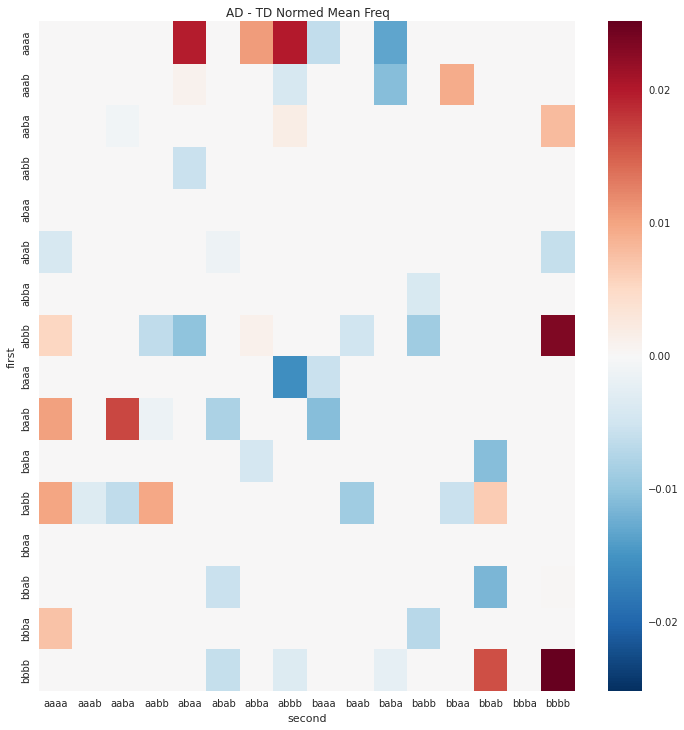

In [5]:
# bigram frequencies for entire dataset
ad_mat, td_mat, conditionals = wordFrequency()
diff_mat = ad_mat - td_mat
sns.plt.figure(figsize=(12,12))
sns.heatmap(diff_mat)
sns.plt.xlabel('second')
sns.plt.ylabel('first')
sns.plt.title('AD - TD Normed Mean Freq')

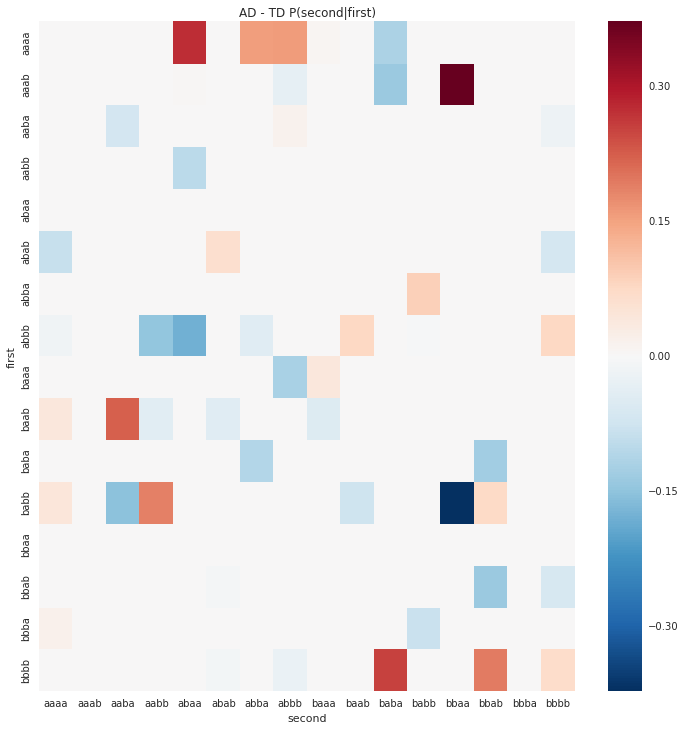

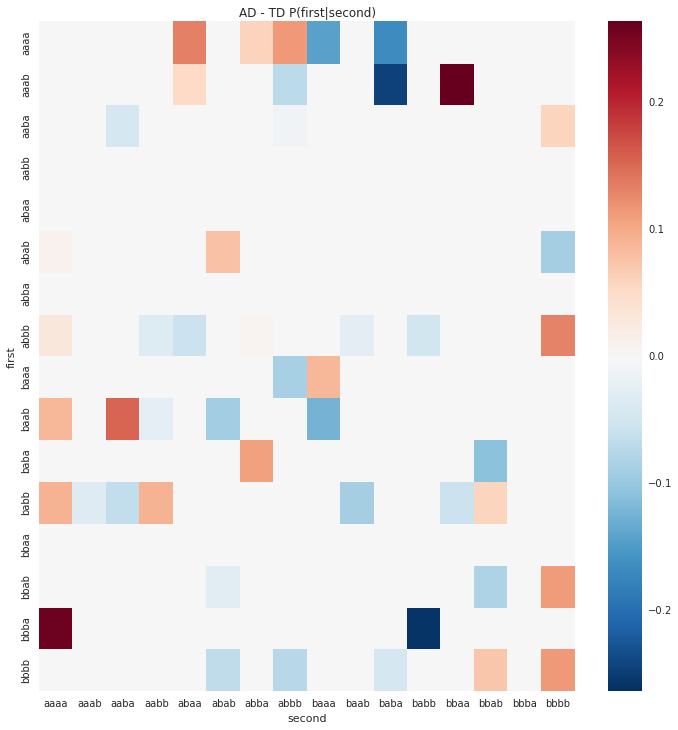

In [4]:
'''
conditional probability matrices
'''
sns.plt.figure(figsize=(12,12))
sns.heatmap(conditionals[0] - conditionals[2])
sns.plt.xlabel('second')
sns.plt.ylabel('first')
sns.plt.title('AD - TD P(second|first)')

sns.plt.figure(figsize=(12,12))
sns.heatmap(conditionals[1] - conditionals[3])
sns.plt.xlabel('second')
sns.plt.ylabel('first')
sns.plt.title('AD - TD P(first|second)')

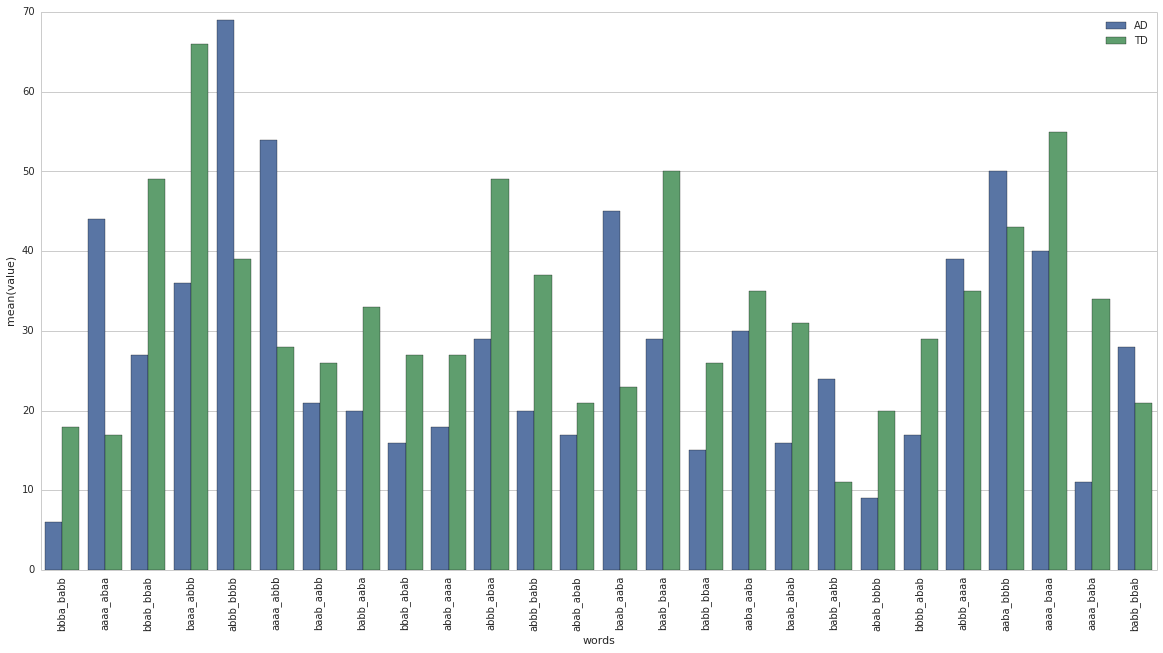

In [31]:
sns.set_style("whitegrid")
sns.plt.figure(figsize=(20,10))
sns.barplot(data=summed_feats,x='words',y='value',hue='variable')
plt.xticks(rotation=90);
plt.legend();

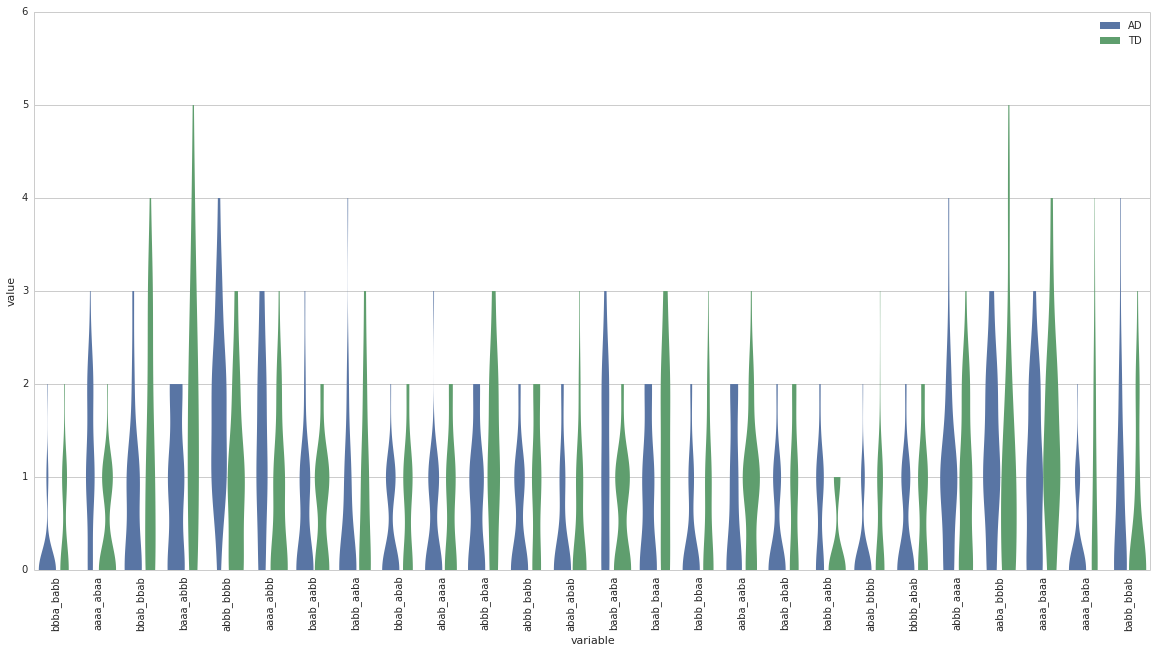

In [30]:
sns.set_style("whitegrid")
sns.plt.figure(figsize=(20,10))
sns.violinplot(data=melted_df,y='value',x='variable',hue='group',cut=0,linewidth=0)
plt.legend();
plt.xticks(rotation=90);
plt.ylim(0,6);

(0, 2)

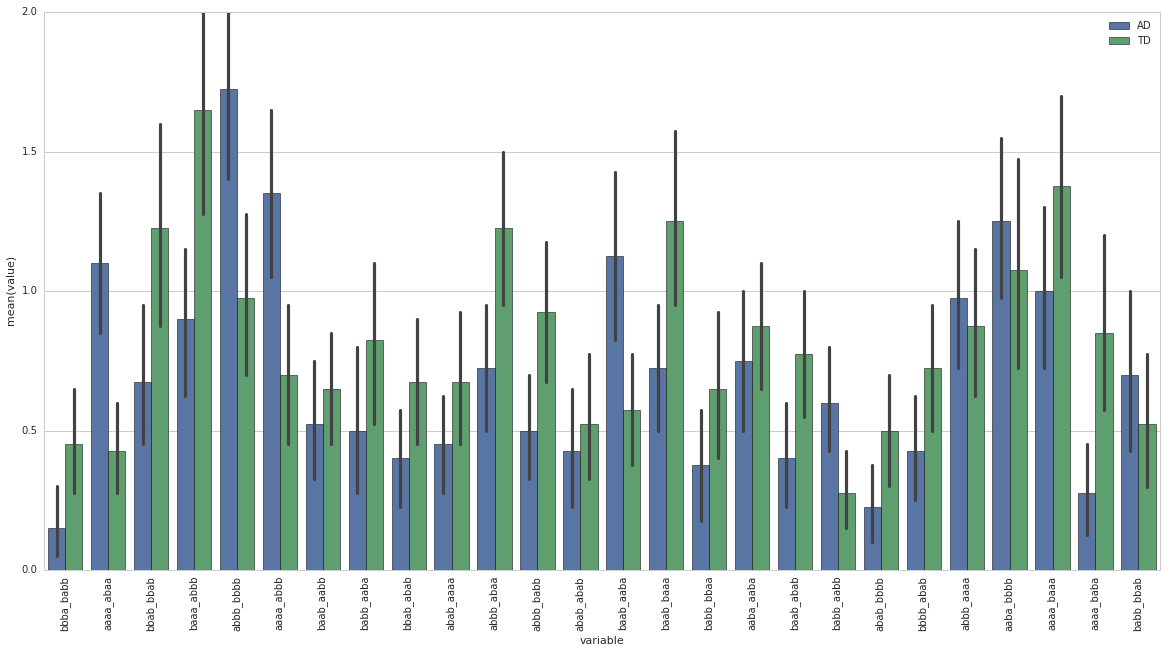

In [25]:
sns.set_style("whitegrid")
sns.plt.figure(figsize=(20,10))
sns.barplot(data=melted_df,y='value',x='variable',hue='group',linewidth=0.5)
plt.legend();
plt.xticks(rotation=90);
plt.ylim(0,2);


In [98]:
gram_contrasts = {'grams':[],'pvals':[]}
for gram in top_features:
    gram1 = melted_df[(melted_df['variable']== gram)
                    & (melted_df['group'] == 'AD')]

    gram2 = melted_df[(melted_df['variable']== gram)
                    & (melted_df['group'] == 'TD')]
    
    gram_contrasts['grams'].append(gram)
    gram_contrasts['pvals'].append(stats.ttest_ind(gram1['value'], gram2['value'])[1])

corrected_contrasts = multicomp.multipletests(gram_contrasts['pvals'], alpha=0.05,method='fdr_bh')
sig_inds = [i for i, x in enumerate(corrected_contrasts[0]) if x]
sig_grams = [top_features[i] for i in sig_inds]
sig_pvals = [corrected_contrasts[1][i] for i in sig_inds]
gram_differences = {'grams':sig_grams,'pvals':sig_pvals}
print gram_differences

{'pvals': [0.02910485777967449, 0.0010183099509527118, 0.037311639509089306, 0.015329159509678955, 0.0095088474741738087, 0.015329159509678955, 0.02910485777967449, 0.02910485777967449, 0.015329159509678955, 0.02910485777967449, 0.035892091293331874, 0.02910485777967449, 0.015329159509678955], 'grams': [u'bbba_babb', u'aaaa_abaa', u'bbab_bbab', u'baaa_abbb', u'abbb_bbbb', u'aaaa_abbb', u'abbb_abaa', u'abbb_babb', u'baab_aaba', u'baab_baaa', u'baab_abab', u'babb_aabb', u'aaaa_baba']}


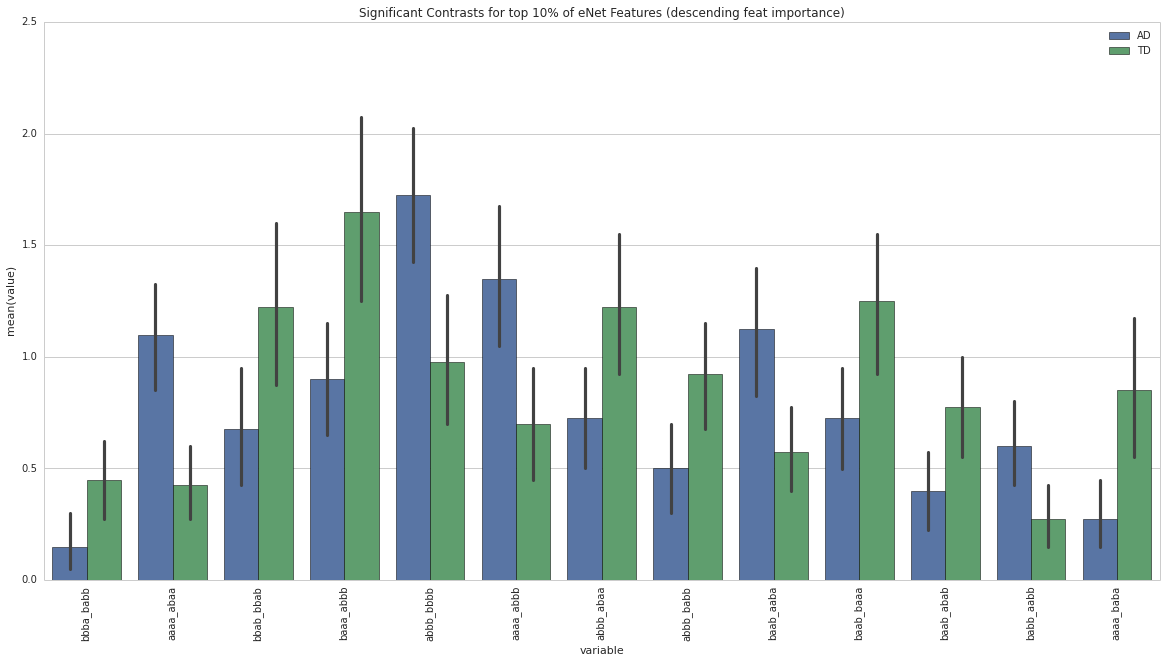

In [123]:
sig_df = melted_df[melted_df['variable'].isin(gram_differences['grams'])]

sns.set_style("whitegrid")
sns.plt.figure(figsize=(20,10))
sns.barplot(data=sig_df,y='value',x='variable',hue='group',linewidth=0.5)
plt.legend();
sns.plt.title("Significant Contrasts for top 10% of eNet Features (descending feat importance)")
plt.xticks(rotation=90);

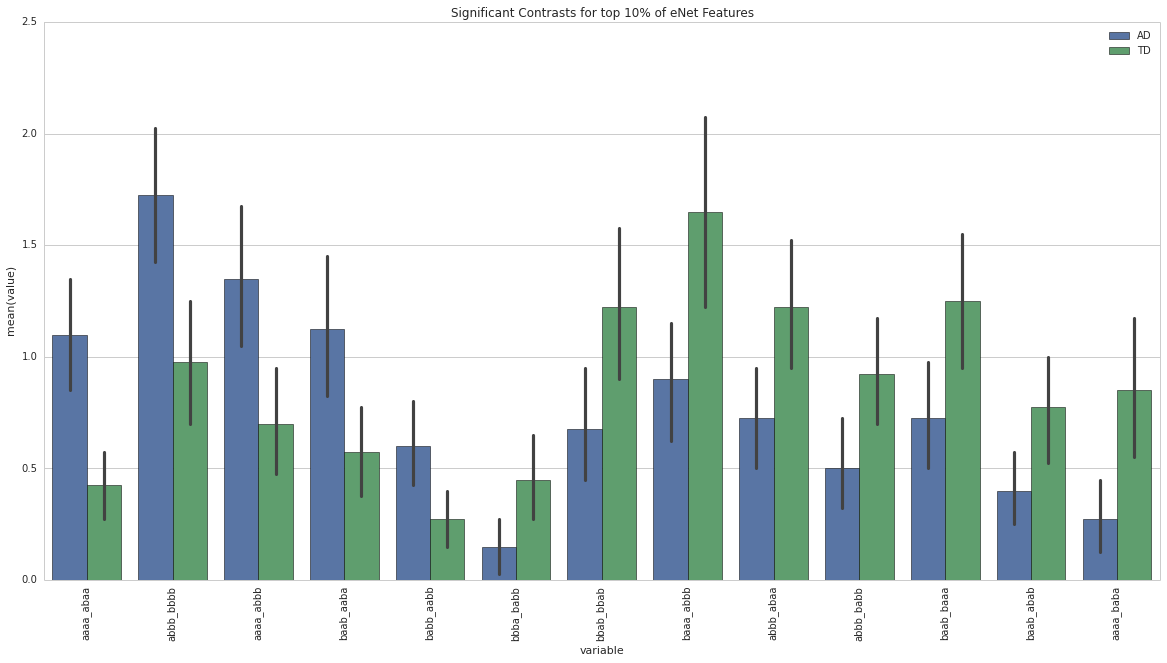

In [122]:
more_AD, more_TD = [], []
for gram in gram_differences['grams']:
    gram_diff = sig_df[(sig_df['variable'] == gram)
                & (sig_df['group'] == 'AD')]['value'].mean() - sig_df[(sig_df['variable'] == gram)
                                                                      & (sig_df['group'] == 'TD')]['value'].mean()
    if gram_diff > 0:
        more_AD.append(gram)
    else:
        more_TD.append(gram)
        
order_by = more_AD + more_TD

sns.set_style("whitegrid")
sns.plt.figure(figsize=(20,10))
sns.barplot(data=sig_df,y='value',x='variable',hue='group',linewidth=0.5,order=order_by)
plt.legend();
sns.plt.title("Significant Contrasts for top 10% of eNet Features")
plt.xticks(rotation=90);

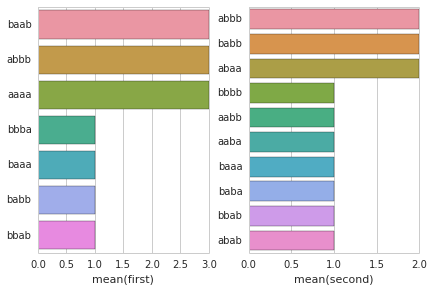

In [106]:
word_counts = {'first':[],'second':[]}
for word in gram_differences['grams']:
    word_counts['first'].append(word[0:4])
    word_counts['second'].append(word[5:9])

word_counts = pd.DataFrame.from_dict(word_counts)

f, (ax1, ax2) = plt.subplots(1,2)
f.tight_layout()
first_df = pd.DataFrame(word_counts['first'].value_counts())
sns.barplot(data=first_df,x=first_df['first'],y=first_df.index,ax=ax1)

second_df = pd.DataFrame(word_counts['second'].value_counts())
sns.barplot(data=first_df,x=second_df['second'],y=second_df.index,ax=ax2)

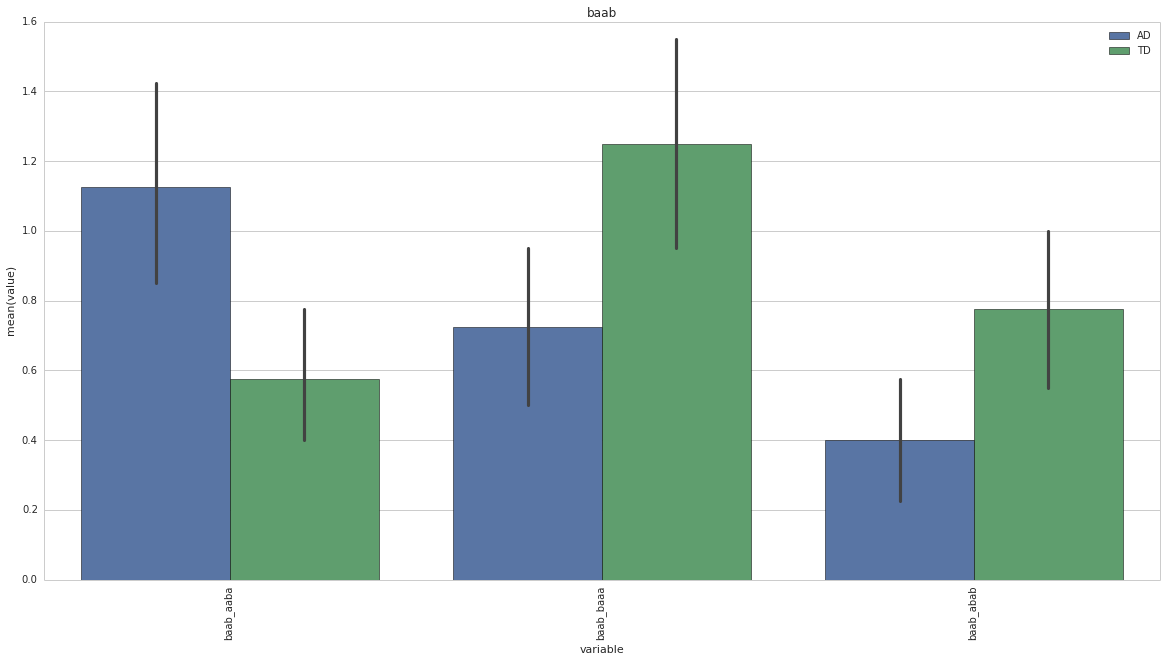

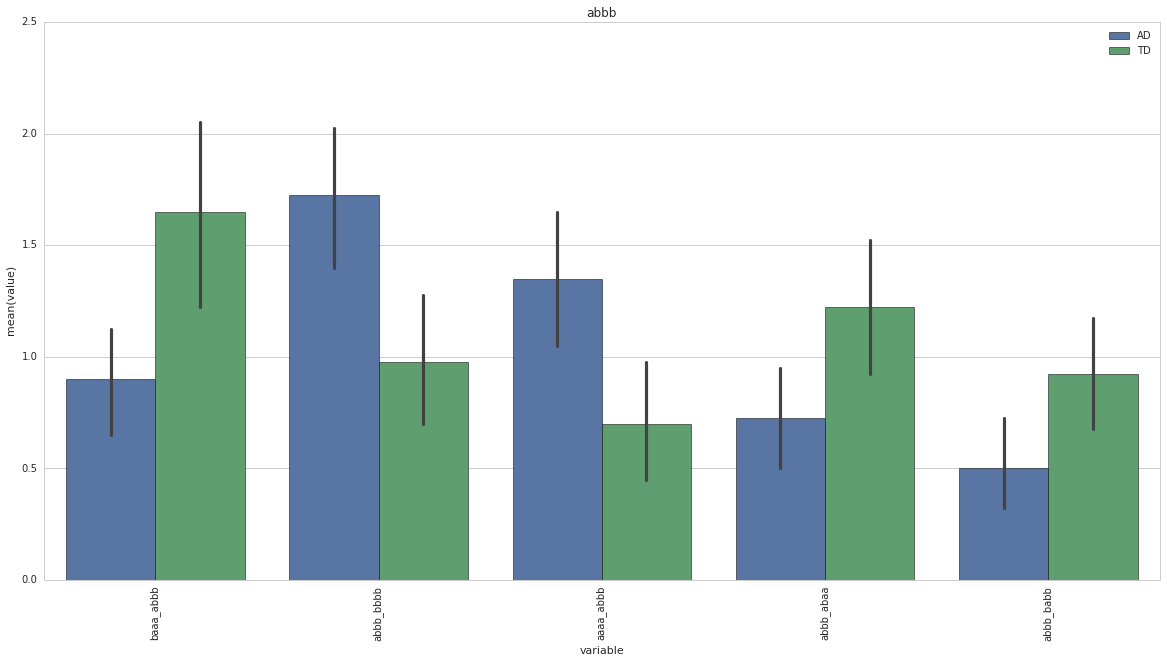

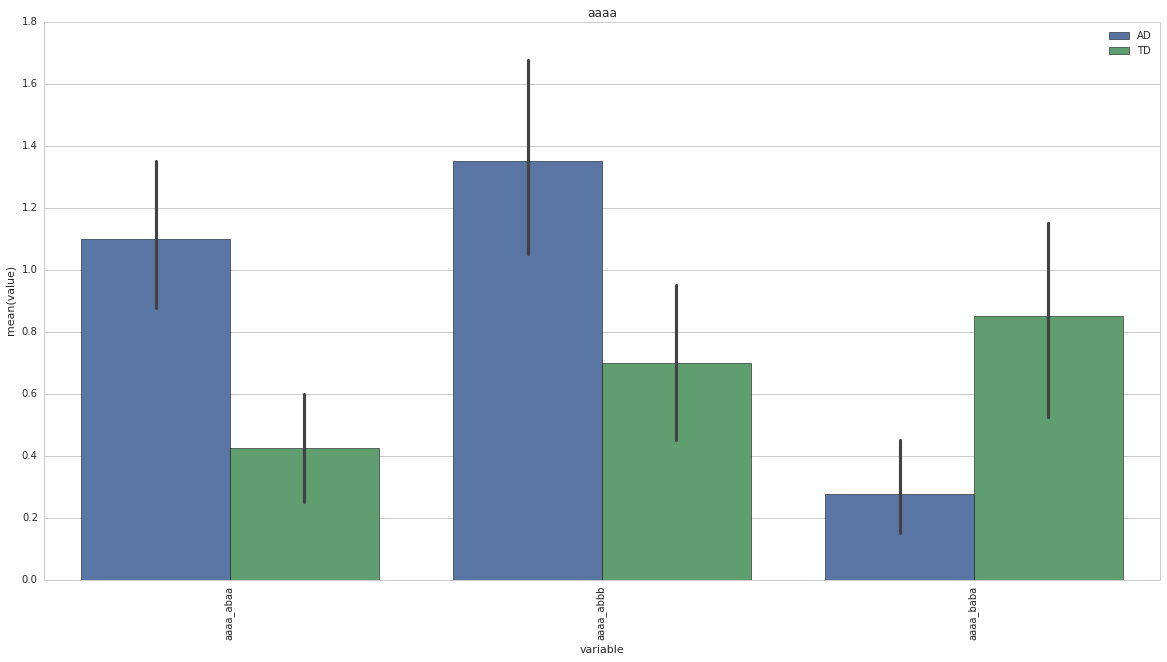

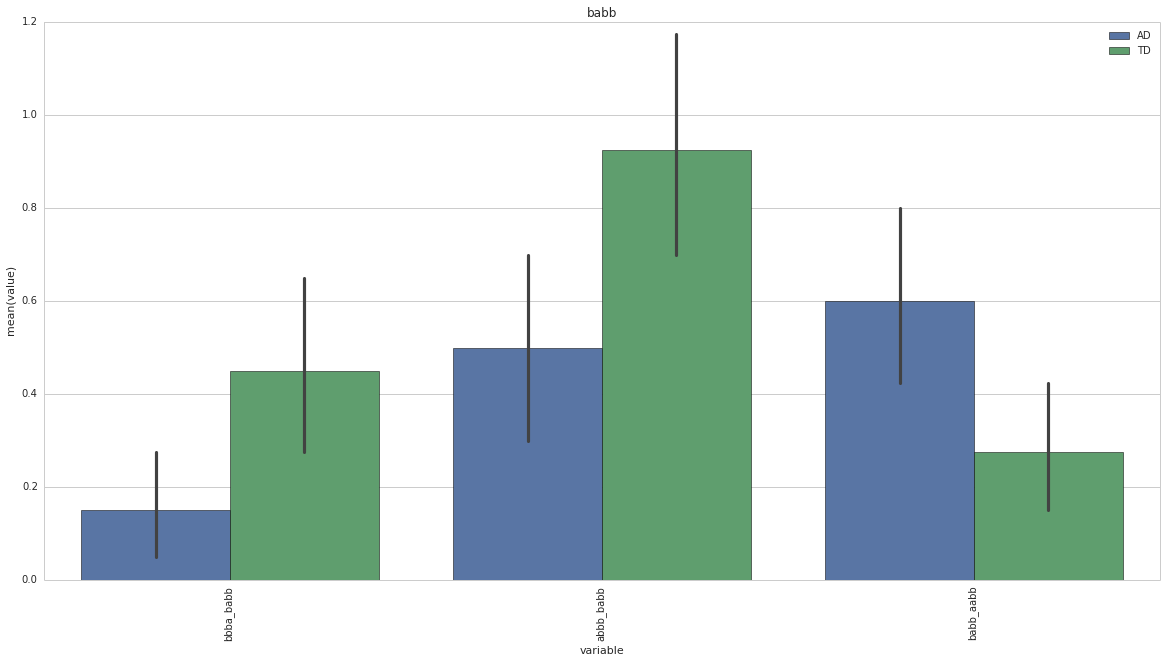

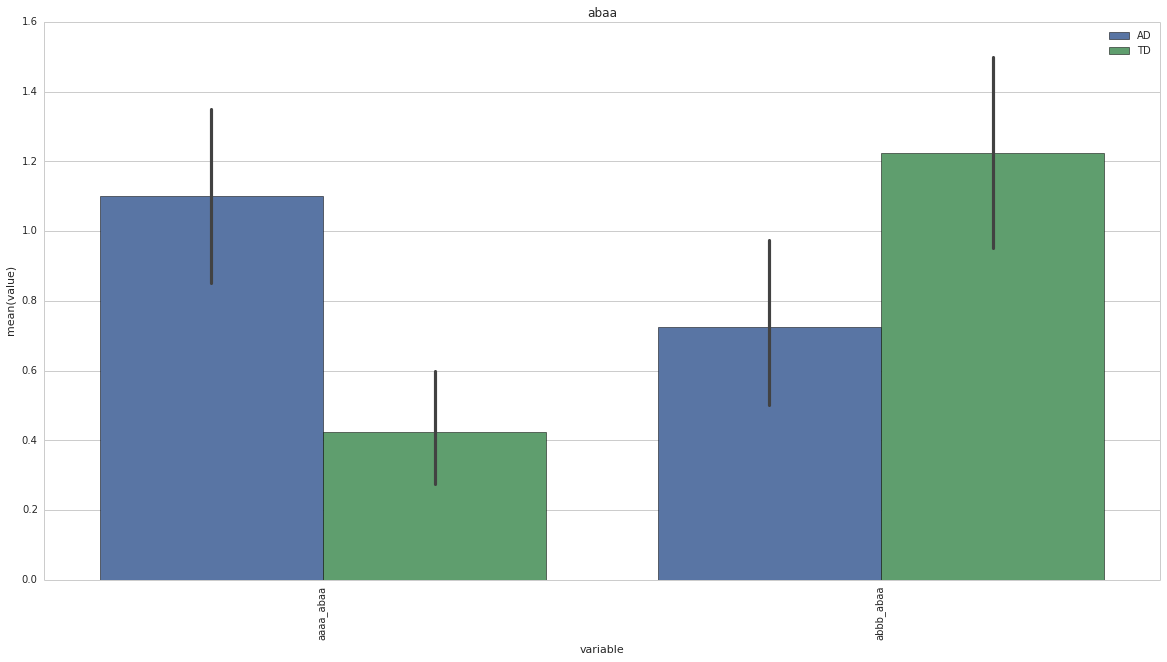

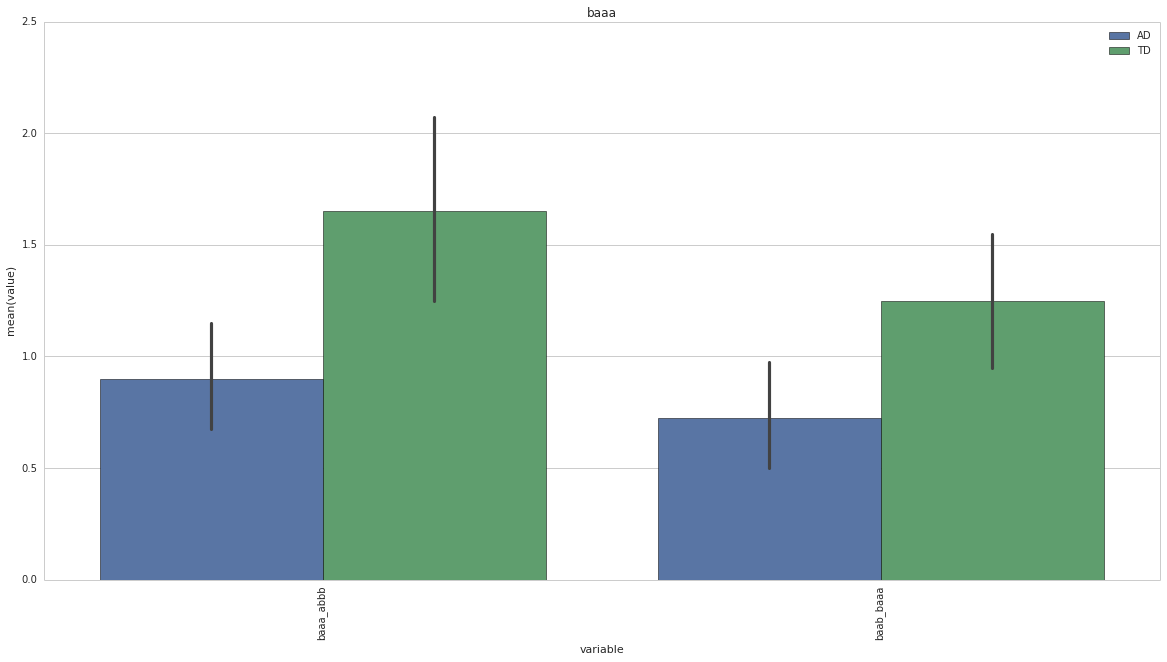

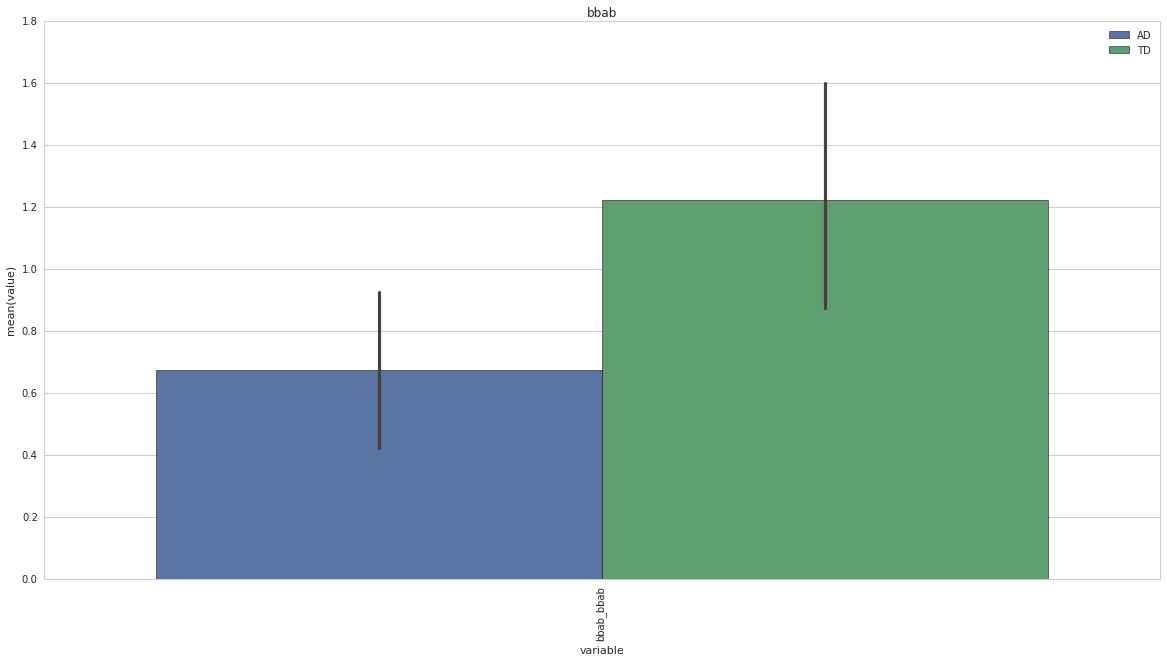

In [105]:
frequent_words = ['baab','abbb','aaaa','babb','abaa','baaa','bbab'] #shows up at least twice
for word in frequent_words:
    word_df = sig_df[sig_df['variable'].str.contains(word)]
    
    sns.set_style("whitegrid")
    sns.plt.figure(figsize=(20,10))
    sns.barplot(data=word_df,y='value',x='variable',hue='group',linewidth=0.5)
    plt.legend();
    plt.xticks(rotation=90);
    sns.plt.title(word);
    #plt.ylim(0,1);